In [1]:
import pandas as pd
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt
import BRKGA as brkga

importing Jupyter notebook from BRKGA.ipynb


In [2]:
dem = pd.read_csv("AnalisePopulacionalTratada.csv",index_col=0)
dem = dem.reindex(index = sorted(dem.index))

In [3]:
prox = pd.read_csv("Proximidade.csv",dtype=int, index_col=0)
prox.columns = prox.columns.to_numpy(int)
prox = prox.reindex(index = sorted(prox.index), columns=sorted(prox.columns))

cover_list = []
for i in prox.index:
    cover = 0
    for j in prox.index:
        cover += prox.loc[i][j]*dem.loc[i]["Population"]
    cover_list.append(cover)

In [4]:
_relation = pd.Series(np.random.randint(0,92,40),index=range(0,40))
facilities_cost = np.random.randint(1000000,10000000,40)
facilities_cover = np.random.randint(100,1000,40)

In [15]:
Heuristic = brkga.BRKGA(facilities_cover,facilities_cost,20,20,4,2,20,False)

In [16]:
solutions, facilities = Heuristic.Solve()

In [17]:
best_solutions = Heuristic.getObjectiveEvolution()

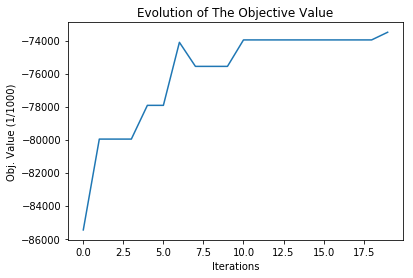

In [19]:
plt.plot(range(0,20),pd.Series(best_solutions)/1000)
plt.xlabel("Iterations")
plt.ylabel("Obj. Value (1/1000)")
plt.title("Evolution of The Objective Value")
plt.savefig("Evolution.png")

In [ ]:
exit_data = pd.DataFrame(facilities)
exit_data["sol_value"] = solutions
exit_data.to_csv("Solutions.csv")